In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Study the Evolution of Z in function of Ps

In [2]:
a = 0.5e-6 # Patch radius  [m]
k = 0.24 # Area Compression modulus [N.m^-1]

In [3]:
def displacement_solver(Ps, a, k):
    """
        Find the displacement for a given applied Pressure
        
        Parameters
        ----------
        
        Ps : float
            Pressure attributed to the circumferential tension 
            per unit length in the membrane [Pa]
        a : float
                Patch radius  [m]
        k : float
            Area Compression modulus [N.m^-1]
    
        Returns
        -------
        Z : array
            Patch displacement [m]
        """
    params = [2*k,-Ps*a**2,0,-Ps*a**4]

    Z = np.roots(params)
    Z = Z[np.isreal(Z)].real

    return Z[0]

In [4]:
Ps_mmHg = np.linspace(2.5,200,1976)
Ps_Pa = Ps_mmHg * 133.322
Z=[]

for pres in Ps_Pa:
    Z.append(displacement_solver(pres,a,k)) # in [nm]

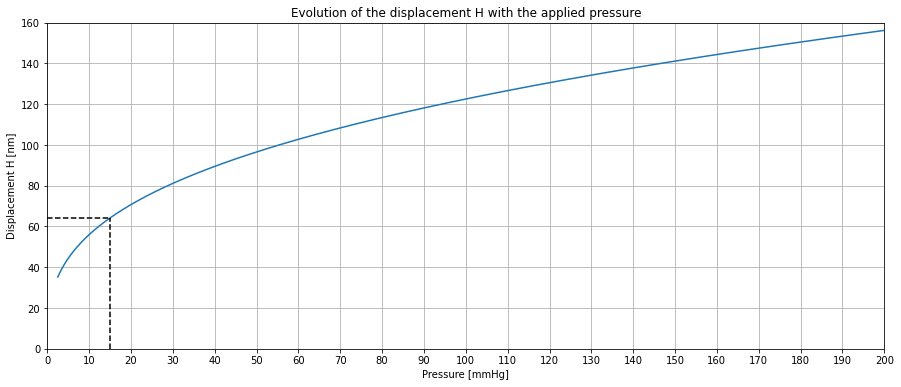

In [5]:
plt.figure(figsize = (15,6))
Z_nm = np.array(Z) * 10**9
plt.plot(Ps_mmHg, Z_nm)
plt.grid()
plt.xlabel('Pressure [mmHg]')
plt.ylabel('Displacement H [nm]')
plt.vlines(15,0,Z_nm[Ps_mmHg == 15],linestyles ='dashed', color = 'black')
plt.hlines(Z_nm[Ps_mmHg == 15],0,15,linestyles ='dashed', color = 'black')
plt.xticks(np.arange(0, max(Ps_mmHg)+1, 10.0))
plt.yticks(np.arange(0, max(Z_nm)+10, 20.0))
plt.xlim([0,200])
plt.ylim([0,160])
plt.title('Evolution of the displacement H with the applied pressure')
plt.show()


In [6]:
higher_Ps = np.arange(0.1e6,1.05e6,0.05e6)
Z_high=[]

for pres in higher_Ps:
    Z_high.append(displacement_solver(pres,a,k))


Text(0.5, 1.0, 'Evolution of the Patch displacement with the applied pressure')

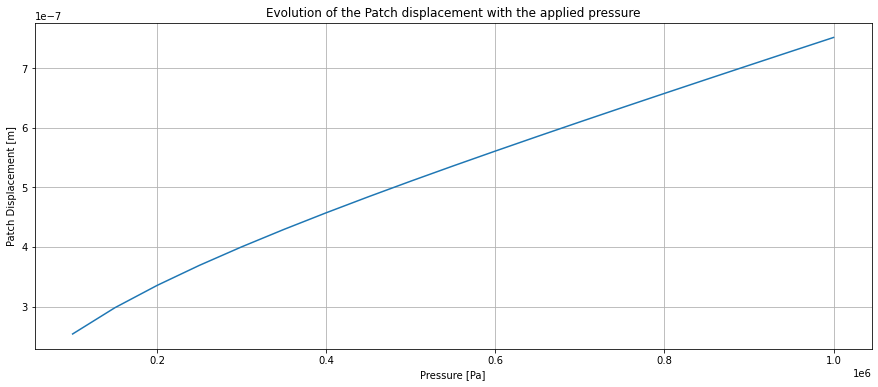

In [7]:
plt.figure(figsize = (15,6))
plt.plot(higher_Ps,Z_high)
plt.grid()
plt.xlabel('Pressure [Pa]')
plt.ylabel('Patch Displacement [m]')

plt.title('Evolution of the Patch displacement with the applied pressure')

The relationship seems to be linear for higher pressure

In [8]:
Z_15mmHg = displacement_solver(2000,a,k)
print('For an applied pressure of -15mmHg, the patch displacement is {:.2e} meters'.format(Z_15mmHg))
print('This corresponds to a displacement of 64.2 nm')

For an applied pressure of -15mmHg, the patch displacement is 6.42e-08 meters
This corresponds to a displacement of 64.2 nm


# 2. Find the mechanical stress in the membrane

Now that we know the patch displacement for different pressure, we can determine the radius of curvature of the membrane

In [9]:
def set_R_curv(Z):
    R = (a**2 + Z**2) / (2*Z)
    return R

In [10]:
R = []
for z in Z: 
    R.append(set_R_curv(z))

Text(0.5, 1.0, 'Evolution of radius of curvature with the Patch displacement')

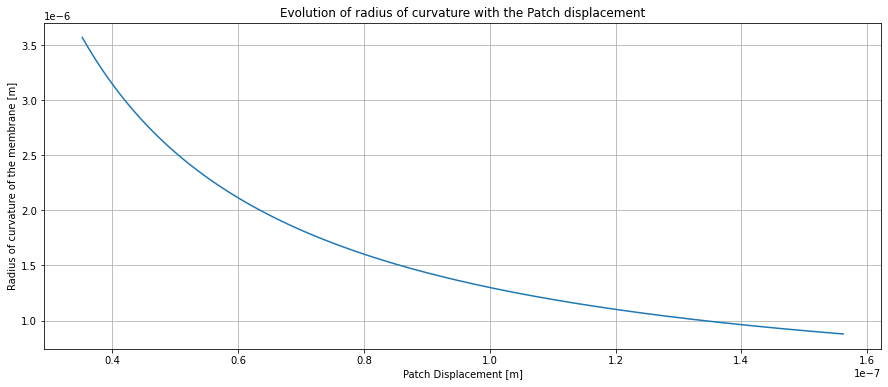

In [11]:
plt.figure(figsize = (15,6))
plt.plot(Z,R)
plt.grid()
plt.ylabel('Radius of curvature of the membrane [m]')
plt.xlabel('Patch Displacement [m]')
plt.title('Evolution of radius of curvature with the Patch displacement')

In [12]:
R_high = []
for z in Z_high: 
    R_high.append(set_R_curv(z))

Text(0.5, 1.0, 'Evolution of radius of curvature with the Patch displacement')

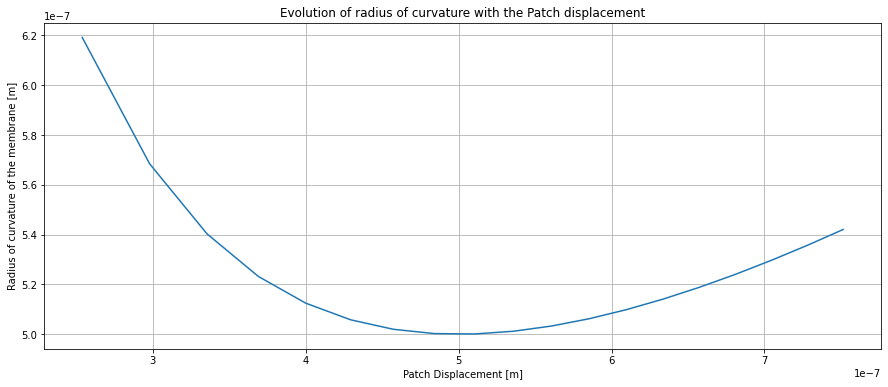

In [13]:
plt.figure(figsize = (15,6))
plt.plot(Z_high,R_high)
plt.grid()
plt.ylabel('Radius of curvature of the membrane [m]')
plt.xlabel('Patch Displacement [m]')
plt.title('Evolution of radius of curvature with the Patch displacement')

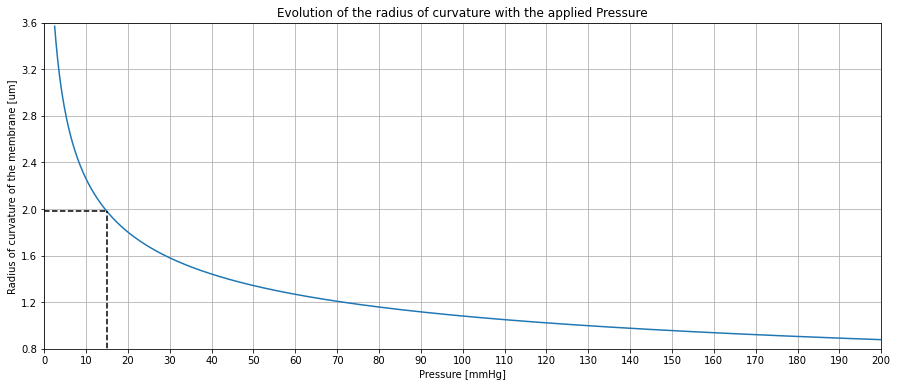

In [15]:
plt.figure(figsize = (15,6))
R_um = np.array(R) * 10**6
plt.plot(Ps_mmHg,R_um)
plt.grid()
plt.ylabel('Radius of curvature of the membrane [um]')
plt.xlabel('Pressure [mmHg]')
plt.vlines(15,0,R_um[Ps_mmHg == 15],linestyles ='dashed', color = 'black')
plt.hlines(R_um[Ps_mmHg == 15],0,15,linestyles ='dashed', color = 'black')
plt.xticks(np.arange(0, max(Ps_mmHg)+1, 10.0))
plt.yticks(np.arange(0, max(R_um)+1, .4))
plt.xlim([0,200])
plt.ylim([0.8,3.6])
plt.title('Evolution of the radius of curvature with the applied Pressure')
plt.show()

Text(0.5, 1.0, 'Evolution of the radius of curvature with the applied Pressure')

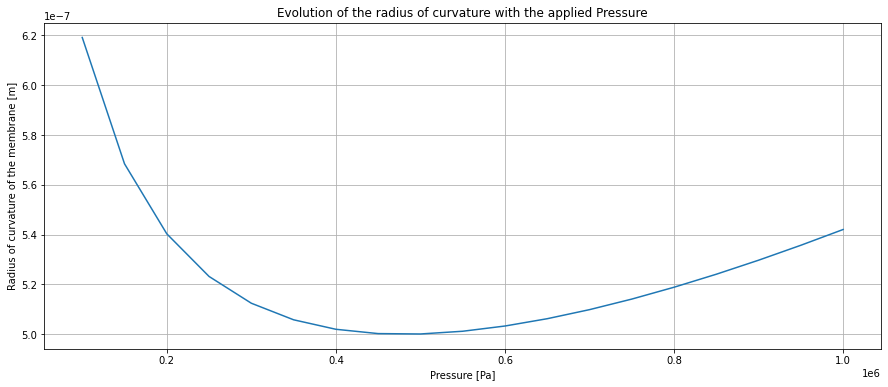

In [16]:
plt.figure(figsize = (15,6))
plt.plot(higher_Ps,R_high)
plt.grid()
plt.ylabel('Radius of curvature of the membrane [m]')
plt.xlabel('Pressure [Pa]')
plt.title('Evolution of the radius of curvature with the applied Pressure')

The relationship seems to be linear for higher pressure

In [17]:
def set_tension(R,Ps):
    Ts = (R * Ps)

    return Ts 

Text(0.5, 1.0, 'Evolution of the tension with the patch displacement')

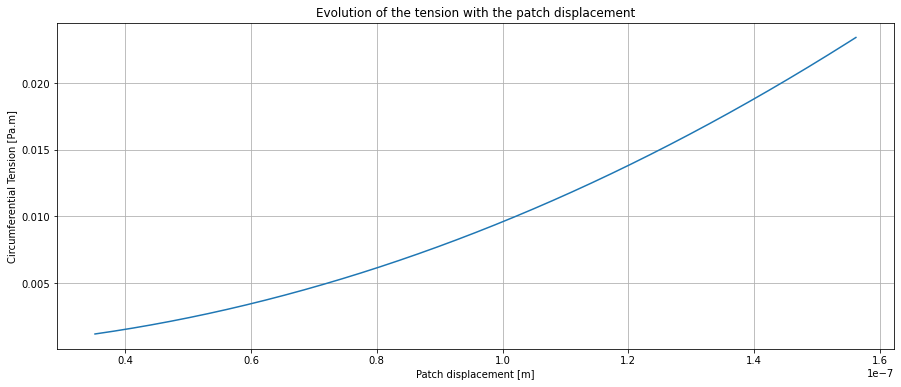

In [18]:
Ts = set_tension(R, Ps_Pa)

plt.figure(figsize = (15,6))
plt.plot(Z,Ts)
plt.grid()
plt.xlabel('Patch displacement [m]')
plt.ylabel('Circumferential Tension [Pa.m]')
plt.title('Evolution of the tension with the patch displacement')

In [19]:
def set_tension2(k,Z,a):
    Ts = k*(Z/a)**2

    return Ts 

Text(0.5, 1.0, 'Evolution of the tension with the patch displacement')

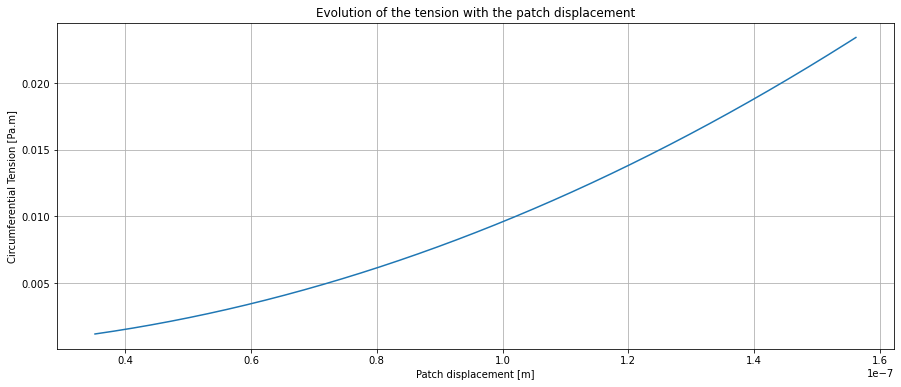

In [20]:
Ts2=[]
for z in Z:
    Ts2.append(set_tension2(k, z, a))

plt.figure(figsize = (15,6))
plt.plot(Z,Ts2)
plt.grid()
plt.xlabel('Patch displacement [m]')
plt.ylabel('Circumferential Tension [Pa.m]')
plt.title('Evolution of the tension with the patch displacement')

Text(0.5, 1.0, 'Evolution of the tension with the patch displacement')

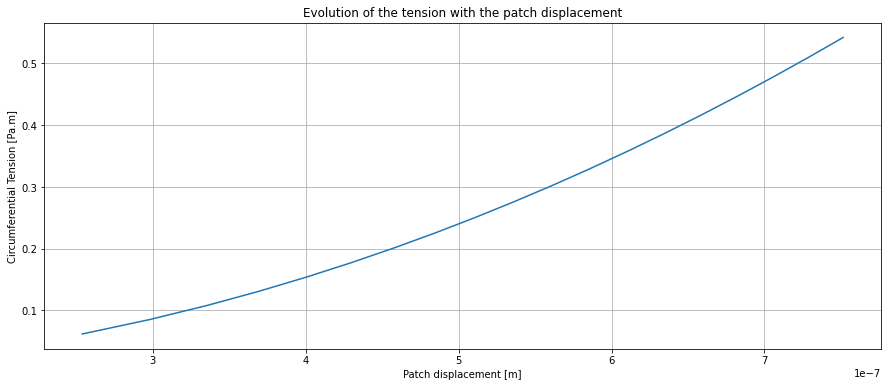

In [21]:
Ts_high = set_tension(R_high, higher_Ps)

plt.figure(figsize = (15,6))
plt.plot(Z_high,Ts_high)
plt.grid()
plt.xlabel('Patch displacement [m]')
plt.ylabel('Circumferential Tension [Pa.m]')
plt.title('Evolution of the tension with the patch displacement')

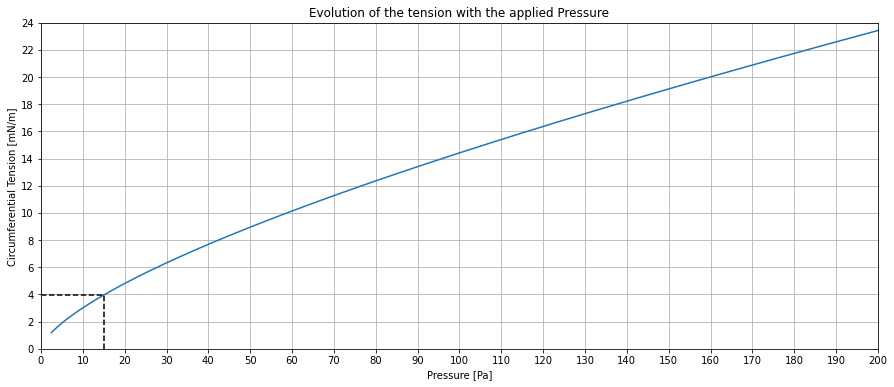

In [40]:
plt.figure(figsize = (15,6))
Ts_mPa = Ts * 10**3
plt.plot(Ps_mmHg,Ts_mPa)
plt.grid()
plt.xlabel('Pressure [Pa]')
plt.ylabel('Circumferential Tension [mN/m]')
plt.vlines(15,0,Ts_mPa[Ps_mmHg == 15.],linestyles ='dashed', color = 'black')
plt.hlines(Ts_mPa[Ps_mmHg == 15.],0,15,linestyles ='dashed', color = 'black')
plt.xticks(np.arange(0, max(Ps_mmHg)+1, 10))
plt.yticks(np.arange(0, max(Ts_mPa)+1, 2))
plt.xlim([0,200])
plt.ylim([0,24])
plt.title('Evolution of the tension with the applied Pressure')
plt.show()

Text(0.5, 1.0, 'Evolution of the tension with the applied Pressure')

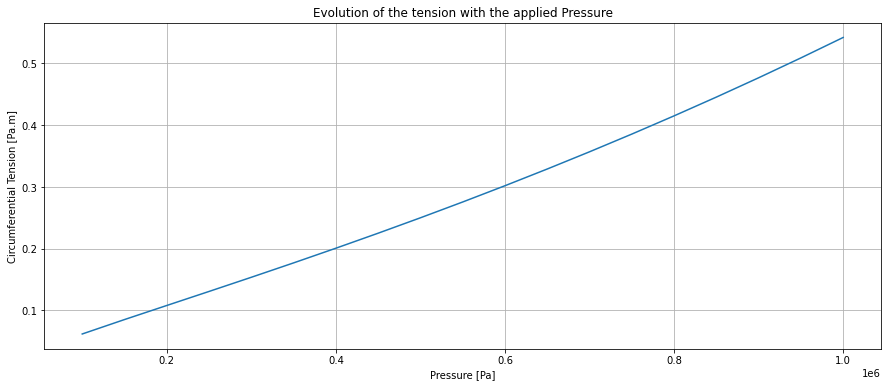

In [22]:
plt.figure(figsize = (15,6))
plt.plot(higher_Ps,Ts_high)
plt.grid()
plt.xlabel('Pressure [Pa]')
plt.ylabel('Circumferential Tension [Pa.m]')
plt.title('Evolution of the tension with the applied Pressure')